# 10장. 회귀분석 (2) 자동차 연비 예측 분석

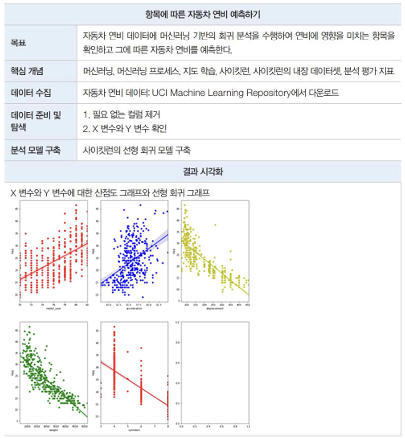
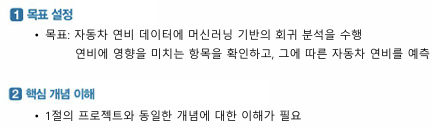

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

In [2]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('./10장_data/auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [3]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


1. mpg(Miles per gallon) : 갤런 당 주행 마일 수, 즉 연비. 값이 높을수록 연비가 좋음
2. cylinders : 차량의 실린더 수. 엔진에 몇 개의 실린더가 있는지 나타내며, 실린더 수가 많을수록 일반적으로 출력이 높지만 연비는 낮아질 수 있다.
3. displacement : 배기량. 엔진이 연료와 공기를 배출하는 총 용적을 나타냄. 단위는 보통 cubic inches(세제곱 인치)로 표현
4. horsepower : 마력, 차량 엔진의 출력 또는 힘을 나타냄. 마력이 높을수록 차량의 성능이 더 강력
5. weight : 차량의 무게.
6. acceleration : 가속력. 0에서 60마일(또는 100km/h)까지 도달하는 시간. 단위는 보통 초로 표현
7. model_year : 차량이 생산된 연도
8. origin : 차량의 원산지(제조국)
9. car_name : 차량의 모델 이름

#### - 분석하지 않을 변수 제외하기

In [4]:
# 피처 중에서 car_name, origin, horsepower는 분석에 사용하지 않으므로, 
# 제거 data_df.drop() 후 확인 data_df.head()
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [6]:
# 분석에 사용할 데이터셋의 형태 data_df.shape를 확인
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


## 3) 분석 모델 구축

In [8]:
# 자동차 연비 예측을 위해 다음과 같이 선형 회귀 분석 모델을 구축
'''
사이킷런을 사용하여 머신러닝 선형회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한
train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
'''
자동차 연비를 예측하는 것이 프로젝트의 목표이므로, mpg 피처를 회귀식의 종속변수Y로 설정하고, 
mpg를 제외한 나머지 피처를 독립변수X로 설정
'''
# X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [12]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [14]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [15]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

평가 지표를 통해 선형회귀분석모델을 평가하고 회귀계수를 확인하여 자동차연비에 끼치는 피처의 영향을
분석

In [16]:
'''
회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 YY_test를 이미 알고 있음.
평가 데이터의 결과값Y_test과 예측 결과값Y_predict의 오차를 계산하여 모델을 평가.
- mean_ squared_error()를 이용하여 평가 지표 MSE를 구하고, 제곱근을 계산하여 평가 지표 RMSE를 구함.
그리고 r2_score()를 이용하여 평가 지표 R2을 구함
'''
# MSE(Mean Squared Error) : 예측값과 실제값 사이의 오차를 제곱해 평균낸 값.
#                         : 값이 클수록 모델의 예측 정확도가 낮음.
mse = mean_squared_error(Y_test, Y_predict)

# RMSE(Root Mean Squared Error) : MES의 제곱근, 실제값과 예측값 사이의 평균적인 오차를 나타냄
#                               : MSE의 단위를 맞춰줌으로써 해석이 좀 더 직관적이게 됨
rmse = np.sqrt(mse)

# -> MSE와 RMSE가 작을수록 모델의 예측 성능이 좋다고 평가할 수 있음
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

#R^2(결정계수) : 종속 변수(연비)에 대한 모델의 설명력을 나타냄.
#             : 0에서 1사이의 값으로, 1에 가까울수록 모델이 종속 변수 변동을 잘 설명한다는 의미
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [17]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

'''
1. y절편 값 : -17.55 
    -> 독립 변수들이 모두 0일 때, 연비(mpg)의 예측값이 -17.55라는 의미.

2. 회귀 계수 : 회귀 분석에서 독립 변수가 종속 변수에 미치는 영향을 수치로 나타낸 값

3. 회귀 계수 값 해석
model_year (0.76): 차량이 더 최신일수록 연비가 높아집니다. 
차량 모델 연도가 1년 증가할 때마다 연비가 0.76만큼 증가하는 경향을 보입니다.

acceleration (0.20): 가속력이 증가할수록 연비가 좋아집니다. 
가속력이 1 단위 증가할 때마다 연비가 0.20만큼 증가합니다.

displacement (0.01): 배기량이 연비에 미치는 영향은 거의 미미합니다. 
배기량이 1 단위 증가할 때 연비는 0.01만큼 증가합니다.

weight (-0.01): 차량 무게가 증가할수록 연비가 약간 낮아집니다. 
무게가 1 단위 증가할 때 연비는 0.01만큼 감소합니다.

cylinders (-0.14): 실린더 수가 증가할수록 연비가 감소합니다. 
실린더 수가 1개 늘어날 때마다 연비가 0.14만큼 감소합니다.
'''

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [18]:
'''
회귀 모델에서 구한 회귀 계수값lr.coef_과 피처 이름X.columns을 묶어서 Series 자료 형으로 만들고, 
회귀계수값을 기준으로 내림차순ascending = False으로 정렬sort_values( )하여 회귀 계수 값이 큰 항목을 확인
'''
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

[회귀모델 결과로 구성한 자동차 연비 예측 회귀식]
<br>
Ympg = -0.14Xcylinders + 0.01Xdisplacement- 0.01Xweight + 0.20Xacceleration + 0.76Xmodel_year– 17.55

#### - 해석 요약
model_year이 가장 큰 양의 영향을 미치므로, 최신 모델의 차량일수록 연비가 크게 개선되는 것을 알 수 있습니다.
<br>
acceleration도 연비에 긍정적인 영향을 주지만, 영향력은 상대적으로 적습니다.
<br>
반면, cylinders(실린더 수)는 음의 회귀 계수로, 실린더 수가 많을수록 연비가 감소하는 경향을 보입니다. 
<br>
weight도 약간의 음의 영향을 주고 있으며, displacement(배기량)는 거의 영향을 주지 않는 것으로 나타납니다.

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

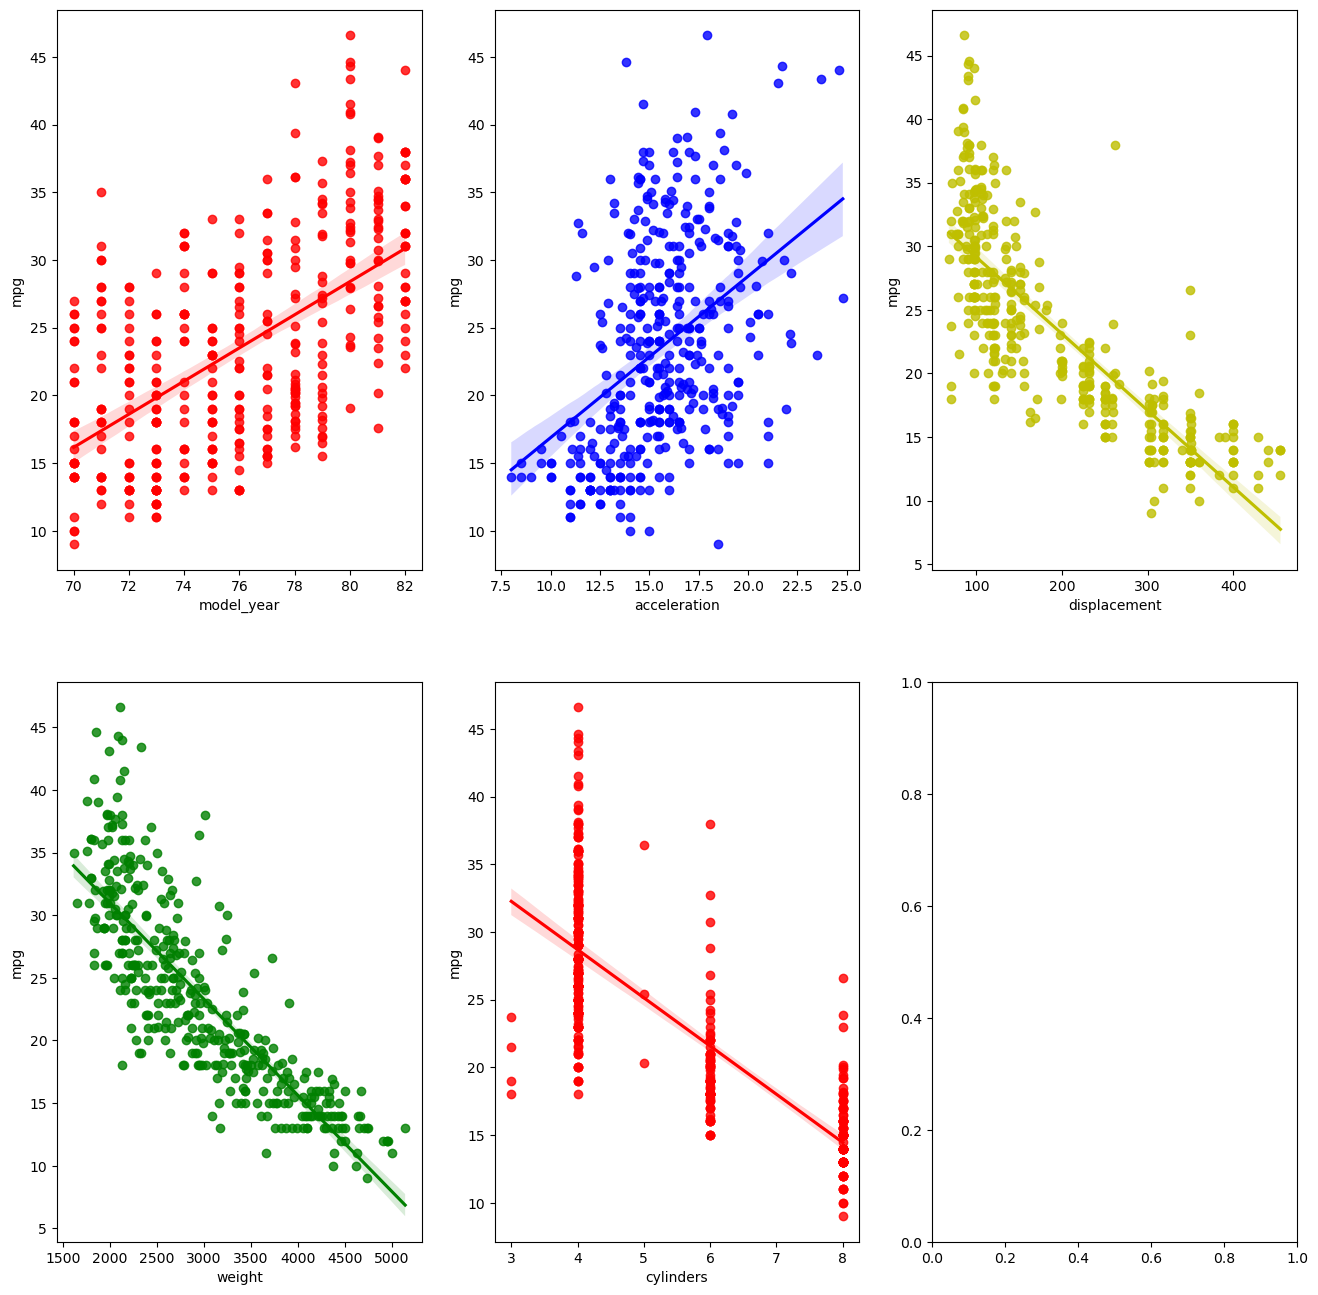

In [20]:
'''
 subplots()를 사용하여 독립 변수인 5개 피처
 ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']와
 종속변수인 연비mpg 와의 회귀관계를 보여주는 5개그래프를 2행 3열 구조로 나타냄
'''
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 연비 예측하기  >>>>

In [21]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.


cylinders :  8
displacement :  350
weight :  3200
acceleration :  22
model_year :  99


In [22]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [23]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 41.32 입니다.
